## Dataset

1. We use the Bank Marketing Dataset from the UCI Machine Learning Repository.
Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

2. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Originally designed for supervised learning, but we will ignore the label initially

Important Decision:

Even though the dataset contains subscribed (whether the client subscribed to a term deposit), we do not use it to train the clustering model.
We may, however, use it later for interpretation only.

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)


## task 1

### Requirements

The goal of this lab is to **explore the bank dataset, prepare it for clustering, and apply K-Means**.  
Follow these steps carefully and write down your observations.  


### **Exploratory Data Analysis (EDA)** (understanding the dataset and its characteristics)

For each feature, you should:

- Identify **numeric vs categorical features**  
- Check **distributions** of numeric features (min, max, mean, std, skewness)  
- Check **counts of categories** for categorical features  
- Identify **missing or unknown values** and decide how to handle them  
- Look for **correlations** between numeric features  
- Identify **outliers** that may affect clustering  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
#df = pd.read_csv('/content/bank.csv')
df = pd.read_csv('/content/bank.csv', sep=';')
df = df.drop(columns=['y'])
# Display basic info
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (4521, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [ ]:
df[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
# Select all numeric columns (integers and floats)
# These will later be scaled because K-Means is distance-based
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Select all categorical columns (stored as object type)
# These will later be encoded into numeric format (e.g., One-Hot Encoding)
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric Features:")
print(numeric_cols)

print("\nCategorical Features:")
print(categorical_cols)

Numeric Features:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [ ]:
df[numeric_cols].skew()

,0
age,0.699501
balance,6.596431
day,0.094627
duration,2.772420
campaign,4.743914
pdays,2.717071
previous,5.875259


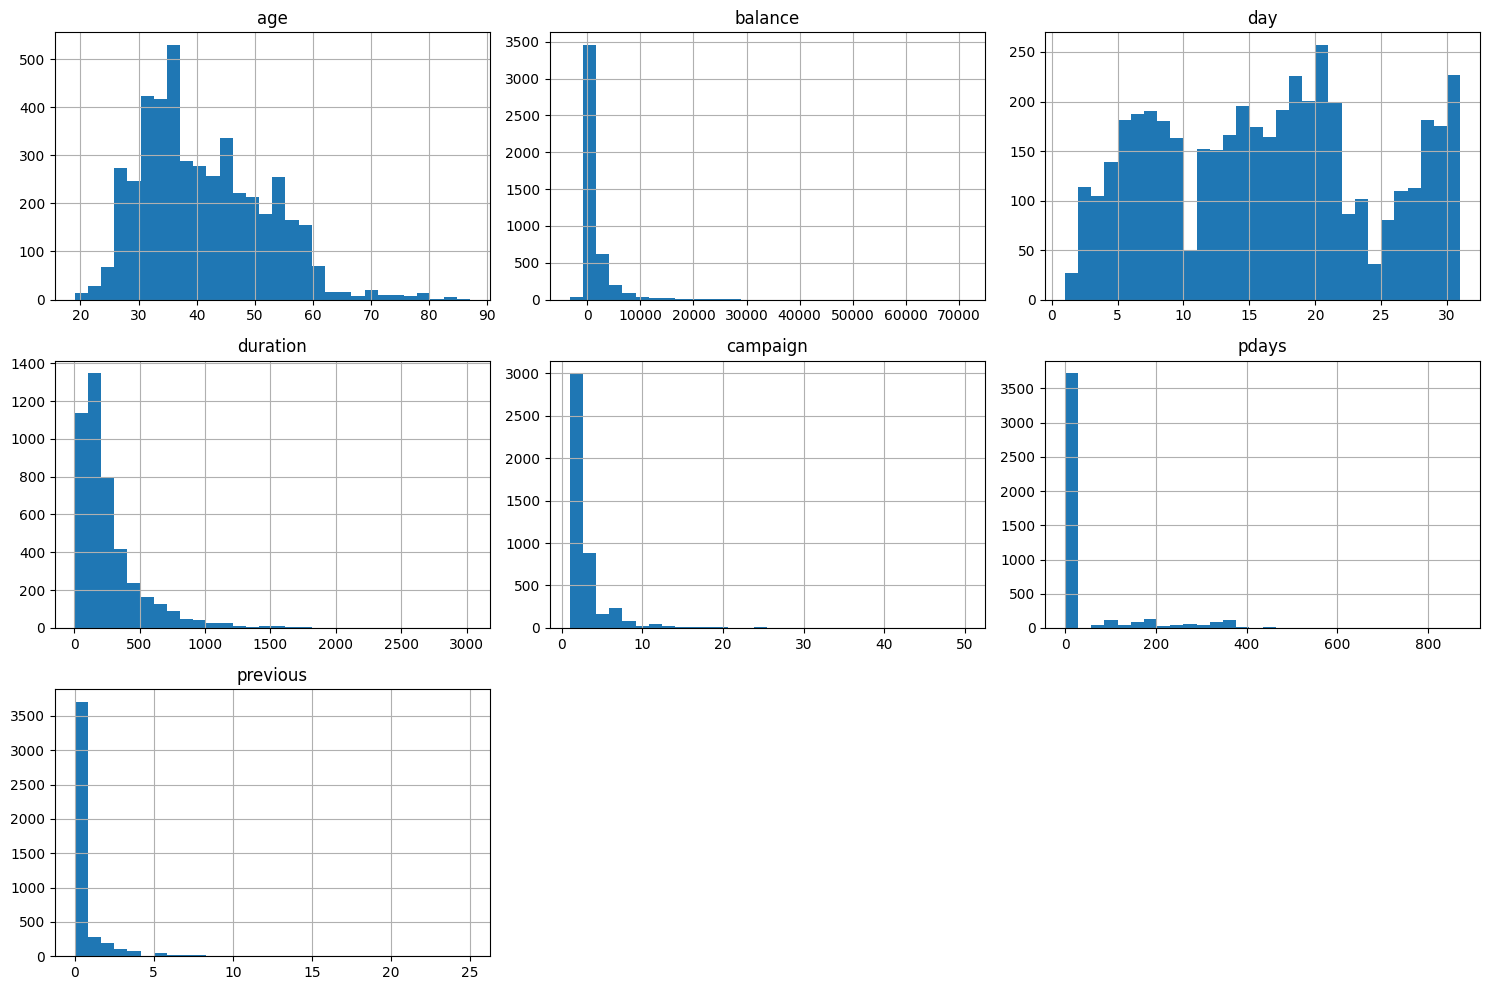

In [ ]:
# Plot histograms for all numeric features
# This helps visualize the distribution of each numerical variable
df[numeric_cols].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

In [ ]:
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


job value counts:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

marital value counts:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

education value counts:
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

default value counts:
default
no     4445
yes      76
Name: count, dtype: int64

housing value counts:
housing
yes    2559
no     1962
Name: count, dtype: int64

loan value counts:
loan
no     3830
yes     691
Name: count, dtype: int64

contact value counts:
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

month value counts:
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222

In [ ]:
for col in categorical_cols:
    print(f"{col} unknown count:", (df[col] == 'unknown').sum())

job unknown count: 38
marital unknown count: 0
education unknown count: 187
default unknown count: 0
housing unknown count: 0
loan unknown count: 0
contact unknown count: 1324
month unknown count: 0
poutcome unknown count: 3705


In [ ]:
#turn every unknown value inside the dataset from unknown to nan
df[categorical_cols] = df[categorical_cols].replace('unknown', np.nan)


In [ ]:
# Loop through each categorical column
for col in categorical_cols:

    # Replace missing values (NaN) with the most frequent category (mode)
    # mode()[0] selects the most common value in that column
    df[col] = df[col].fillna(df[col].mode()[0])

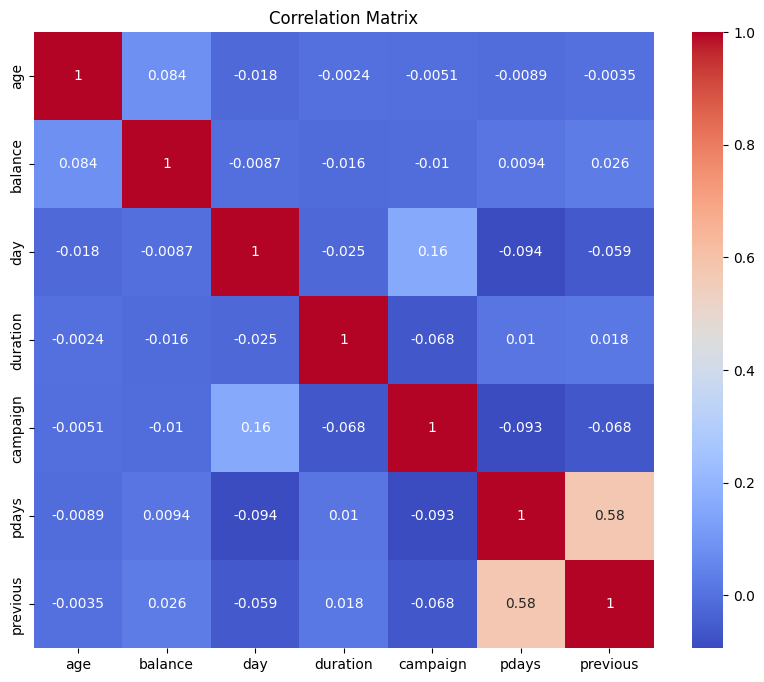

In [ ]:
plt.figure(figsize=(10,8))
# Compute correlation matrix for numerical features only
# corr() calculates Pearson correlation coefficient between variables
# annot=True shows correlation values inside each cell
# cmap='coolwarm' colors positive correlations red and negative blue
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')

# Add title to the heatmap
plt.title("Correlation Matrix")

# Display the plot
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Dictionary to store number of outliers for each numeric column
outlier_summary = {}

# Loop through each numerical feature
for col in numeric_cols:

    # Calculate first (25%) and third (75%) quartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Compute Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outlier detection
    # Using standard 1.5 * IQR rule
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify rows where values fall outside the bounds
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Store number of detected outliers for this column
    outlier_summary[col] = len(outliers)

# Print summary of outliers per feature
print("Number of outliers per numeric feature:")
print(outlier_summary)

Number of outliers per numeric feature:
{'age': 38, 'balance': 506, 'day': 0, 'duration': 330, 'campaign': 318, 'pdays': 816, 'previous': 816}


### **Data Preparation**

Before applying K-Means:

- Drop irrelevant or target columns
- Encode categorical features into numeric format
- Scale numeric features so all are comparable for distance calculations  
- Check that the final dataset has **no missing values** and **all features are numeric**  

In [ ]:
# One-hot encode the specified categorical columns in df
# drop_first=True removes the first category to avoid multicollinearity
# The result is stored in df_encoded without modifying the original df
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Initialize a StandardScaler to standardize numeric features
scaler = StandardScaler()

# Apply scaling to the numeric columns: mean=0, std=1
# fit_transform computes mean and std on df_encoded[numeric_cols] and transforms the data
# The scaled values overwrite the original numeric columns in df_encoded
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [ ]:
print("Total missing values:", df_encoded.isnull().sum().sum())
print("All features numeric:", all(df_encoded.dtypes != 'object'))
print("Final dataset shape:", df_encoded.shape)

Total missing values: 0
All features numeric: True
Final dataset shape: (4521, 38)


### **Apply K-Means Clustering**

- Decide an initial number of clusters (K)  
- Fit the K-Means model to your prepared dataset  
- Assign each data point to a cluster

In [ ]:
from sklearn.cluster import KMeans
K=5

In [ ]:
kmeans = KMeans(n_clusters=K, random_state=42)
cluster_labels = kmeans.fit_predict(df_encoded)

In [ ]:
df['cluster'] = cluster_labels

In [ ]:
print("Cluster counts:")
print(df['cluster'].value_counts())
print("\nFirst 5 rows with cluster assignment:")
print(df.head())

Cluster counts:
cluster
0    2049
2    1308
1     588
3     408
4     168
Name: count, dtype: int64

First 5 rows with cluster assignment:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  cluster  
0  cellular   19   oct        79         1     -1         0  failure        0  
1  cellular   11   may       220         1    339         4  failure        1  
2  cellular   16   apr       185         1    330         1  failure        1  
3  cellular    3   jun       199         4     -1         0  failure        0  
4  cellular    5   may

### **Choosing the Convenient K**

- Use **Elbow Method**: plot Sum of Squared Distances (SSD) vs K  
- Identify the **elbow point** where SSD reduction slows  
- Calculate **Silhouette scores** to validate K  

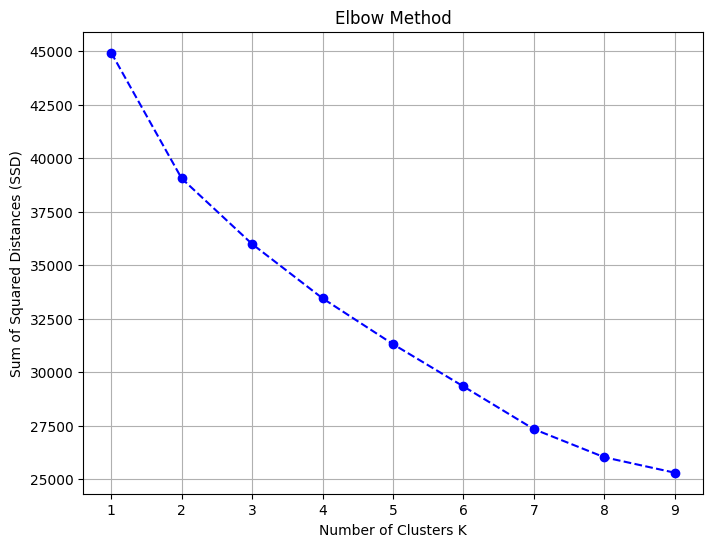

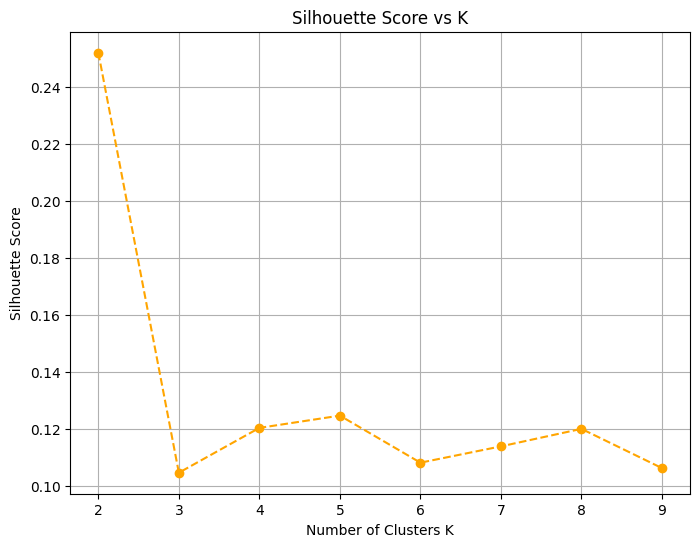

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


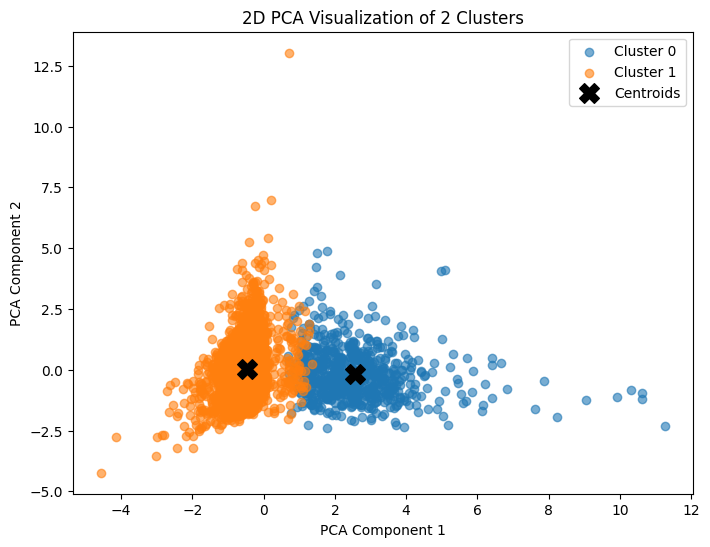

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# -----------------------------------
# 1️⃣ Prepare dataset (X)
# -----------------------------------
# Use the fully preprocessed dataset (encoded + scaled)
# This ensures all features are numeric and comparable for distance calculations
X = df_encoded

# -----------------------------------
# 2️⃣ Elbow Method: SSD vs K
# -----------------------------------
# Compute Sum of Squared Distances (inertia) for different K values
# SSD measures within-cluster compactness (lower is better)
ssd = []
K_range = range(1, 10)  # Test K from 1 to 9

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    ssd.append(km.inertia_)  # Store SSD for each K

# Plot SSD to identify the "elbow point"
plt.figure(figsize=(8,6))
plt.plot(K_range, ssd, 'o--', color='blue')
plt.xlabel("Number of Clusters K")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

# -----------------------------------
# 3️⃣ Silhouette Score: K vs Score
# -----------------------------------
# Silhouette score measures how well-separated clusters are
# Values range from -1 to 1 (higher is better)
sil_scores = []

for k in range(2, 10):  # Silhouette score requires at least 2 clusters
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X)  # Fit and assign cluster labels
    score = silhouette_score(X, labels)  # Compute average silhouette score
    sil_scores.append(score)

# Plot Silhouette scores to validate optimal K
plt.figure(figsize=(8,6))
plt.plot(range(2, 10), sil_scores, 'o--', color='orange')
plt.xlabel("Number of Clusters K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.grid(True)
plt.show()

# -----------------------------------
# 4️⃣ Fit K-Means with optimal K
# -----------------------------------
# Choose optimal K based on Elbow + Silhouette results
K_optimal = 2

# Fit final K-Means model
kmeans = KMeans(n_clusters=K_optimal, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Assign cluster labels back to original dataframe
# This allows further analysis of each cluster's characteristics
df['cluster'] = cluster_labels

# -----------------------------------
# 5️⃣ PCA 2D Visualization of clusters
# -----------------------------------
# Reduce high-dimensional data to 2 principal components
# This is only for visualization purposes
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))

# Plot each cluster in 2D PCA space
for cluster in range(K_optimal):
    plt.scatter(
        X_pca[cluster_labels==cluster, 0],
        X_pca[cluster_labels==cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

# Transform cluster centroids into PCA space for visualization
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            marker='X', s=200, c='black', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'2D PCA Visualization of {K_optimal} Clusters')
plt.legend()
plt.show()